## Numerical Analysis: Introduction, Motivation, Fundamental Principles

### Problem statement

Numerical analysis is a toolbox of methods to find solutions of analysis problems by purely arithmetic operations, that is $+$, $-$, $\times$, and $\div$.  For example, imagine you are performing a physics problem, that requires you to evaluate the definite integral:
$$
\tilde I = \int_a^b f(x)\,\mathrm{d}x = \int_0^\pi x \sin x \,\mathrm{d}x.
$$
You can solve this exactly by applying the chain-rule, to discover $I=\pi$.  But this is not possible for every integrand, for instance
$$
\int_0^t \sqrt{1+\cos^2x}\,\mathrm{d}x
$$
has no closed-form <a href=http://en.wikipedia.org/wiki/Closed-form_expression>[1]</a> solution.  Let's consider the 1st problem:

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
a,b = 0,np.pi
def f(x): return x**3 * np.cos(x)
Iexact = np.pi

### Numerical approach

A <i>numerical</i> approach to the same problem is inspired by the geometric interpretation of the (Riemann <a href=http://en.wikipedia.org/wiki/Riemann_integral>[1]</a>) integral, as the area under the curve:

Text(1.5707963267948966, 0.2087728104508437, '$\\int_a^b f(x)dx$')

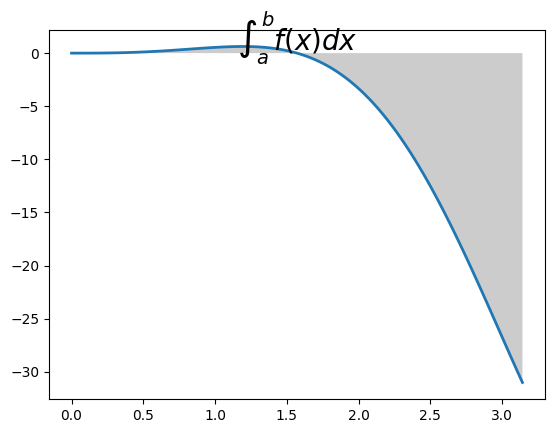

In [24]:
xx = np.linspace(a,b,101)
### Plot the line
plt.plot(xx, f(xx), lw=2)
### Plot the area
plt.fill_between(xx, 0, f(xx), facecolor='gray', alpha=0.4)
### Draw the math
plt.text(0.5*(a + b), np.max(f(xx))/3,r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)

This immediately suggest the Trapezoidal rule: divide the interval $[a,b]$ into $n$ smaller intervals, and approximate the area under the curve in each interval by the area of a trapezoid:

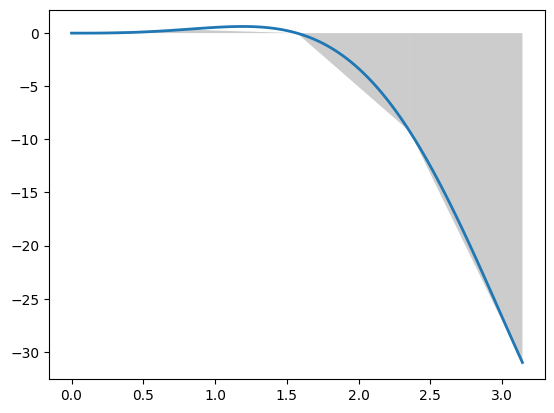

In [25]:
n = 4
xi = np.linspace(a,b,n+1)
fi = f(xi)
plt.plot(xx, f(xx), lw=2)
# Plot each trapezoid
for i in range(n):
    plt.fill_between(xi[i:i+2], 0, fi[i:i+2], facecolor='gray', alpha=0.4)

Writing this symbolically we have 
$$
\tilde I \approx I^\mathrm{trap}_n := \sum_{i=0}^{n} h \cdot \frac{f(x_i) + f(x_{i+1})}{2}, \\
x_i = \frac{(b-a)i}{n}, \\
h = \frac{b-a}{n}
$$
Performing this step, from a graphical represpentation of our method, to an algebraic representation is an essential skill you should learn in this course.  The inverse, algebraic to graphical, is equally important.  From the graphical representation we can gain strong intuition about the method (e.g. that the error will decrease with more nodes), from the algebraic we can implement it:

In [26]:
def I_trap(f,a,b,n):
    sum = 0.
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    for i in range(n):
        sum += 0.5*h*(f(x[i]) + f(x[i+1]))
    return sum

And the approximate area is:

In [27]:
I_trap(f,a,b,n)

-19.171622118716638

### Properties of the numerical approach

It is not enough to have a numerical approximation of $\tilde I$; we must also understand the properties of the approximation with respect to $n$ and the <i>error</i>:
$$
e_n^\mathrm{trap} := | I_n^\mathrm{trap} -\tilde I|.
$$

#### Property #1: Consistency

The most basic requirement on $I_n^\mathrm{trap}$, is that the error approaches zero as $n$ approaches infinity (and $h$ approaches $0$).  We require:
$$
e_n \rightarrow 0 \quad as \quad n \rightarrow \infty \quad( and \quad h \rightarrow 0).
$$
If this is the case for a particular function $f$ and interval $[a,b]$, then the method is said to be <i>consistent</i> for that function.  If it is true for all functions of a particular class, e.g. all continuous functions $f\in C^0([a,b])$, then we say the method is <i>consistent</i> for all continuous functions.  [<b>Background</b>: see <a href=http://en.wikipedia.org/wiki/Smoothness>[2]</a> for a discussion of different classes of functions.  In this course we will only use the $C^k(\mathbb{R})$ spaces.]  If a method is not consistent, then it is almost <b>useless</b> as we can not trust the results.

**Exercise 1: Is the trapezoidal rule above consistent for $f(x) = x \sin(x)$?  Is it consistent for all continuous functions?  The 2nd question comes down to trying to find a continuous function for which $I_n$ does not approach $\tilde I$ as $n\rightarrow\infty$.  Can you think of a function for which it is not consistent?**

Consistency can be verified for specific functions numerically:

In [28]:
print('%6s %12s %12s' % ('n', 'I_n', '|I_n - I|'))
for p in range(1,11):
    n = 2**p
    Iapprox = I_trap(f,a,b,n)
    print('%6d %12.3e %12.3e' % (n, Iapprox, np.abs(Iapprox-Iexact)))

     n          I_n    |I_n - I|
     2   -2.435e+01    2.749e+01
     4   -1.917e+01    2.231e+01
     8   -1.799e+01    2.113e+01
    16   -1.770e+01    2.085e+01
    32   -1.763e+01    2.077e+01
    64   -1.761e+01    2.076e+01
   128   -1.761e+01    2.075e+01
   256   -1.761e+01    2.075e+01
   512   -1.761e+01    2.075e+01
  1024   -1.761e+01    2.075e+01


#### Property #2: Convergence

Convergence is closely related to consistency.  If a method is consistent $e_n\rightarrow 0$ as $n\rightarrow\infty$, but $e_n$ may reduce very slowly - and therefore result in great computational expense.  Convergences concern the <b>rate</b> at which $e_n\rightarrow 0$.  In particular we ask: <i>If we multiply $n$ by $10$, by what factor does $e$ reduce?</i>  We can investigate this numerically for the trapezoidal rule:

Text(0, 0.5, '$\\log_{10}(e)$')

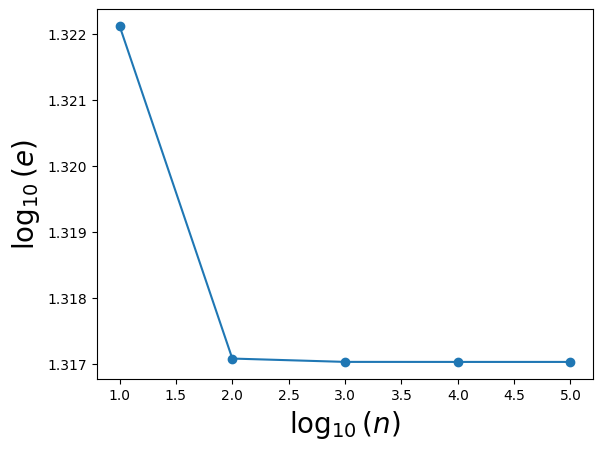

In [29]:
M = 5
nn = np.zeros(M,dtype='int')
Iapprox = np.zeros(M)
for p in range(1,M+1):
    nn[p-1] = 10**p
    Iapprox[p-1] = I_trap(f,a,b,nn[p-1])
plt.plot(np.log10(nn), np.log10(np.abs(Iapprox-Iexact)), '-o')
plt.xlabel(r'$\log_{10}(n)$', fontsize=20)
plt.ylabel(r'$\log_{10}(e)$', fontsize=20)

The plot is log-log as we are concerned with multiples of both $n$ and $e$.  The fact that it's a straight-line indicates that multiplying $n$ by $10$ has the same effect on $e$, whatever the value of $n$.  This is an example of a <i>convergence plot</i>.  We prefer methods for which this line is as steep as possible, because then only a small $n$ is needed for a highly accurate solution.

**Exercise 2: By what factor is $e$ reduced at when $n$ is multipled by $10$?  What value of $n$ is needed to achieve $e_n < 10^{-16}$?  What happens when you try to compute this?**

#### Property #3: Stability

The last property to discuss is <i>stability</i>.  A numerical method is unstable if initially increasing $n$ results in a reduction in error $e$, but further increasing $n$ causes an increase in error.  An example convergence plot for an unstable method might look as follows:

Text(0, 0.5, '$\\log_{10}(e)$')

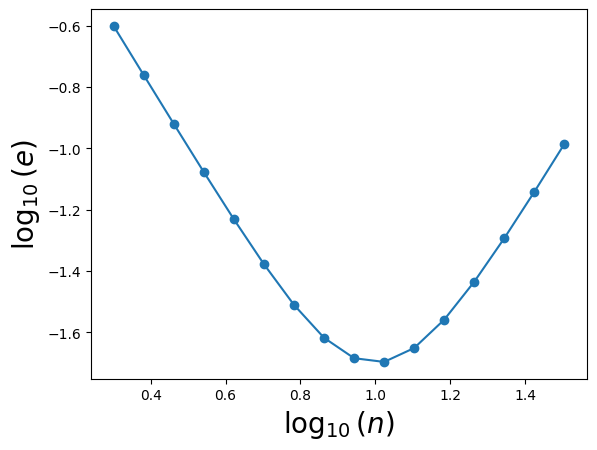

In [30]:
nn = 2**np.linspace(1,5,16)
plt.plot(np.log10(nn),np.log10(nn**-2 + 1.e-4*nn**2),'-o')
plt.xlabel(r'$\log_{10}(n)$', fontsize=20)
plt.ylabel(r'$\log_{10}(e)$', fontsize=20)

An unstable method is not consistent (follows immediately from the defintions).  The trapezoidal rule is never unstable, in polynomial interpolation we will see some examples of instability.

### Numerical experimentation

Try an integrand other than $f(x) = x \sin(x)$.  Since the exact value is not computable in many cases, use "scipy"'s "quad()" function to come up with an accurate estimate.

In [31]:
from scipy.integrate import quad
integral, error = quad(f, a, b)

print("Exact:", integral, "+/-", error)


Exact: -17.608813203268074 +/- 2.051179601468185e-13


The function "quad()" uses some of the techinques we will learn in this course.